### Week 13 In-Class Assignment
#### Angela Spencer - December 15, 2021

#### 1. In markdown, describe KNN in your own words.

K Nearest Neighbor (KNN) is an algorithm that categorizes data based on it's similarity to k, the number of nearest data points.  It is used to determine feature accuracy.  The value of k should remain odd so there can never be a "tie vote" from the nearest neighbors.  A too small K value can have an accuracy rate that is too low and a too high k value can have an incresed bias in the model and can have a high computation time.

#### 2. Using the KNN example from class, write a function that finds the optimal value for k.
###### You should iterate over a range of values and return the k and the score when the accuracy score is maximized. Be sure to only use odd values.

https://towardsdatascience.com/a-simple-introduction-to-k-nearest-neighbors-algorithm-b3519ed98e

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#create x and y variables 
X = diabetes_df.drop('Outcome',axis=1)
y = diabetes_df['Outcome']

#perform train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [4]:
#standardize, create standard scaler object
sc = StandardScaler()

#fit training and test data
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [5]:
#create empty lists to hold data from the loop below
k_values = []
accuracy_values = []

In [6]:
#write a function to loop through the KNN process
def knn_func():
    for k in range(1,50,2):
        
        #set the KNN classifier
        knn=KNeighborsClassifier(n_neighbors=k)
        #fit to training data
        knn.fit(X_train, y_train)
        #predict the testing data
        y_predict = knn.predict(X_test)
        #find the accuracy score
        accuracy = knn.score(X_test,y_test)
        #append the score and k value to lists
        accuracy_values.append(accuracy)
        k_values.append(k)
    else:
        pass
    
    #create a dataframe from the appended lists
    k_values_series = pd.Series(k_values, name = 'k')
    accuracy_values_series = pd.Series(accuracy_values, name = 'accuracy')
    knn_df = pd.concat([k_values_series, accuracy_values_series], axis=1)
    
    #sort the dataframe to find the maximum accuracy score and lowest k value
    #change index to match sorted data
    results = knn_df.sort_values(['accuracy', 'k'], 
                                 ascending=[False,True], ignore_index=True)
    
    #return the first row of the sorted df
    return results.loc[0]


In [7]:
#call function
knn_func()

k           15.000000
accuracy     0.779221
Name: 0, dtype: float64

#### 3. How did the panel influence your thoughts about working in tech, specifically work in the data realm? Discuss with your group and summarize your thoughts in under 250 words.

It was very encouraging to hear the panelists thoughts on changing careers and the pathways each person had to arrive in their current data roles as well as their current and favorite projects.  Particularly helpful was the the encouragment to utilize our existing skills as a means of transitioning into a data science role and the suggestions on interviewing a company and prioritizing mentoring and training.  I also enjoyed hearing about how each person thinks through problems and realized that I am beginning to develop my own set of skills that work through problems in a very similar way.  All of those things combined are very encouraging as I start to shift my resume and look for data science roles in the near future.

Answer from Jamie Mortensen for knn function:
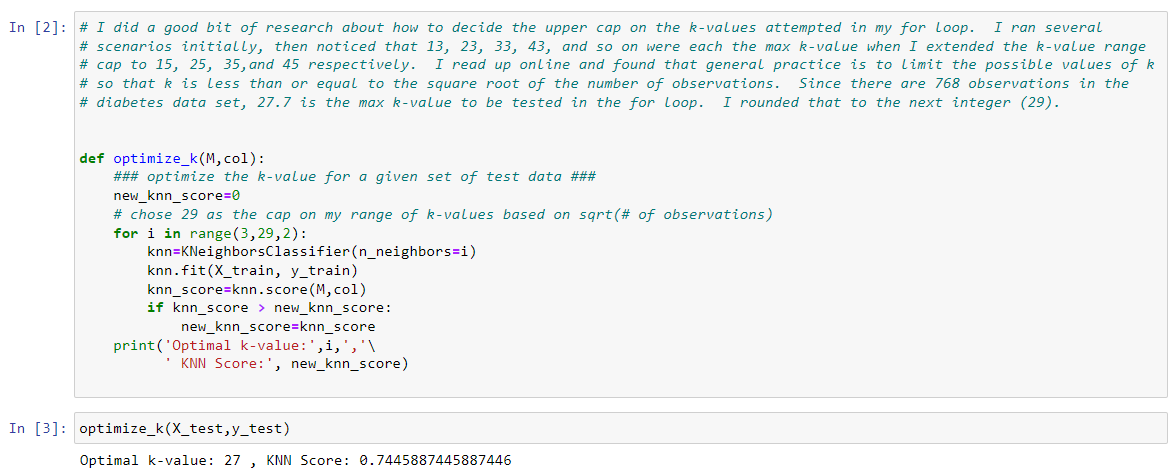